<a target="_blank" href="https://colab.research.google.com/github/BhavikOstwal/FIRST-ML-MODEL/blob/main/notebooks/Price_Predictor.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<p> Author: Bhavik Ostwal

# HOUSE PRICE PREDICTOR MODEL

# Collecting Data and A quick look

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_df = pd.read_csv('../data/housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


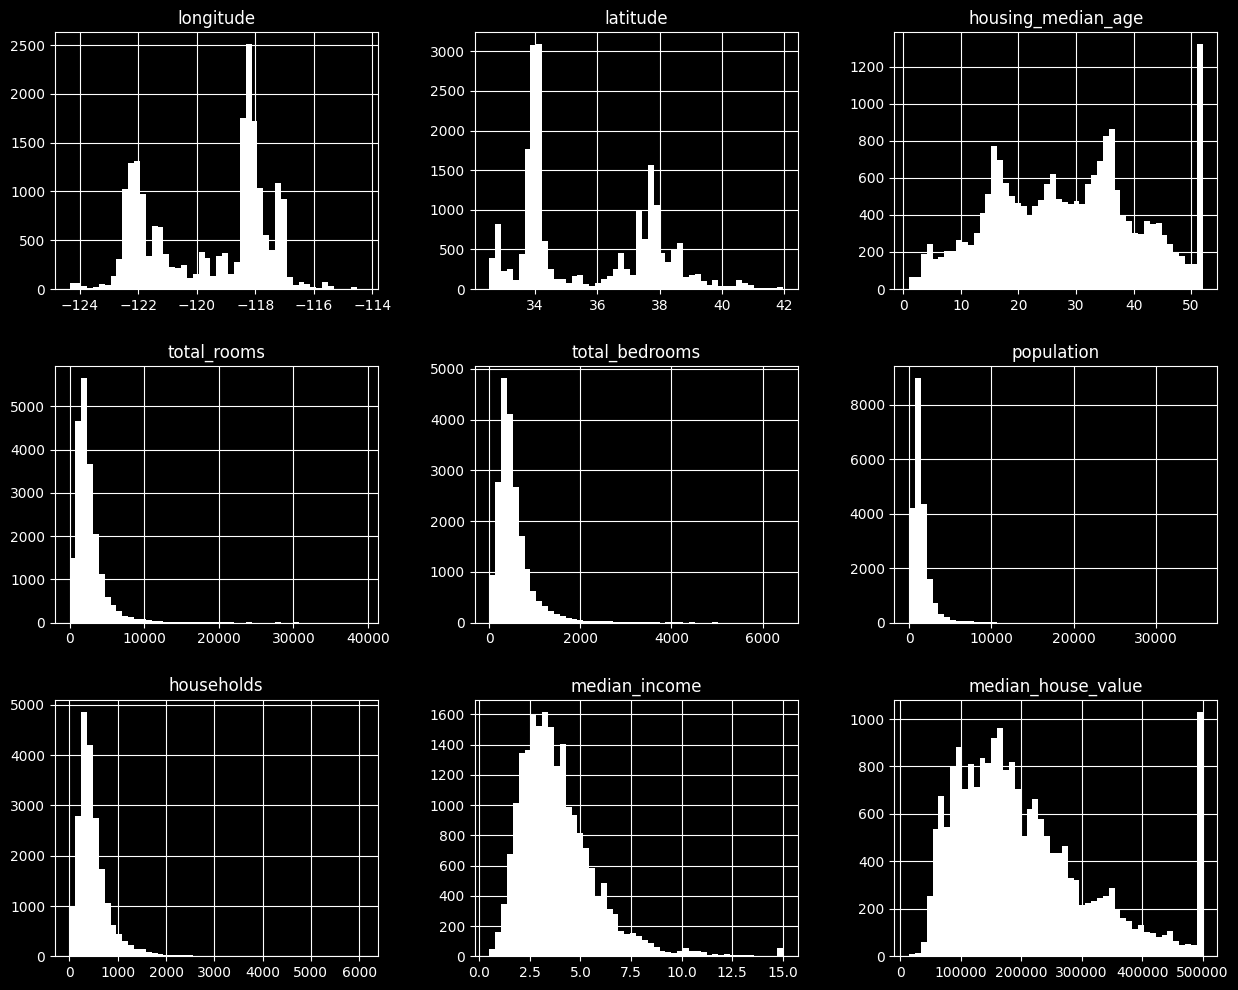

In [5]:
plt.style.use('dark_background')
housing_df.hist(figsize=(15,12), bins=50, color='white')
plt.show()

# Train-Test split

## Random Sampling

In [6]:
from sklearn.model_selection import train_test_split

rand_train, rand_test = train_test_split(housing_df, test_size=0.2, random_state=42)

## Stratified Sampling

Assume: It has been told that the median_inocme attribute is so important to predict house prices

In [7]:
import numpy as np

housing_df['income_cat'] = pd.cut(housing_df['median_income'], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])

<Axes: >

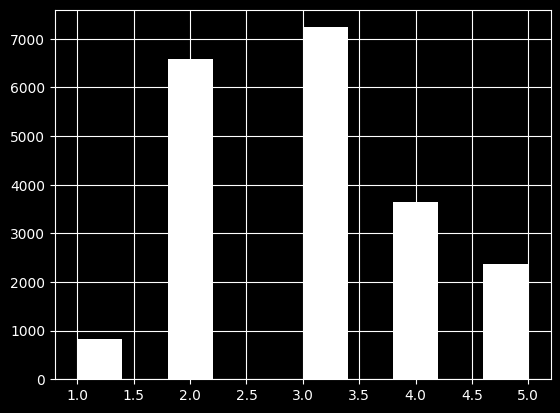

In [8]:
housing_df['income_cat'].hist(color = 'white')

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_ind, test_ind in splitter.split(housing_df, housing_df['income_cat']):
    strat_train_set = housing_df.loc[train_ind]
    strat_test_set = housing_df.loc[test_ind]

Now remove income category coloumn

In [10]:
strat_train_set.drop(['income_cat'], axis=1, inplace=True)
strat_test_set.drop(['income_cat'], axis=1, inplace=True)

In [11]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


# Data cleaning and transforming

In [12]:
features = strat_train_set.drop(['median_house_value'], axis=1)
labels = strat_train_set['median_house_value']

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class BedroomImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        imputer = SimpleImputer(strategy="median")
        X['total_bedrooms'] = imputer.fit_transform(X[['total_bedrooms']]) #--> [['...']] returns the "total_bedrooms" column as a Dataframe rather than Series(when used a single square-bracket)
        # We didn't used SimpleImputer directly because this takes a numpy array as argument. so to ease out, we put an another abstraction layer
        return X

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    
    def fit(self, X, y=None):
        return self # nothing else to do 

    def transform(self, X, y=None):
        X = X.copy()  # to avoid SettingWithCopyWarning
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['population_per_household'] = X['population'] / X['households']
        if self.add_bedrooms_per_room:
            X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        return X

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

partial_pipeline = Pipeline([
    ('imputer', BedroomImputer()),
    ('attribute_adder', AttributesAdder(True)),
    ('feature_scaler', StandardScaler()) # -> StandardScaler() is the one that gives output as a numpy array
])

# output = partial_pipeline.fit_transform(strat_train_set.drop(['ocean_proximity'], axis=1))

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

complete_pipeline = ColumnTransformer([
    ('numerical_pipe', partial_pipeline, list(features.drop(['ocean_proximity'], axis=1))),
    ('categorical_pipe', OneHotEncoder(), ["ocean_proximity"])
])


In [16]:
features_processed = complete_pipeline.fit_transform(features)

In [17]:
categorical_encoder = complete_pipeline.named_transformers_['categorical_pipe']
categorical_columns = list(categorical_encoder.categories_[0])
categorical_columns

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

<======== Just Messing around ========>

In [18]:
a = strat_train_set['ocean_proximity'].value_counts().to_dict().keys()
a = list(a)
a

['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

In [19]:
num_features_transformed_df = pd.DataFrame(features_processed, columns=features.drop(["ocean_proximity"], axis=1).columns.tolist() + ['rooms_per_household', 'population_per_household', 'bedrooms_per_room'] + categorical_columns)


In [20]:
num_features_transformed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.466353,-0.092580,-0.443846,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.050362,0.023024,-0.516065,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.509240,-0.037436,0.322869,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.328149,-0.059156,-0.457023,1.0,0.0,0.0,0.0,0.0


<==================>

In [21]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


# Selecting and Training a Model

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(features_processed, labels)

some_data = features.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = complete_pipeline.transform(some_data)

# predictions = lin_reg.predict(features_processed[:10])
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 86208. 304704. 153536. 185728. 244416.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [23]:
from sklearn.metrics import mean_squared_error

training_predict = lin_reg.predict(features_processed)
line_mse = mean_squared_error(labels, training_predict)
rmse = line_mse**0.5
rmse

68633.40810776998

##### Saving the model

In [24]:
import joblib

In [25]:
joblib.dump(lin_reg, "../models/lin_reg_model")

['../models/lin_reg_model']

In [26]:
a = joblib.load("../models/lin_reg_model")

In [27]:
a.predict(features_processed)

array([ 86208., 304704., 153536., ..., 220800., 238976.,  97984.])

### Decision Tree Regression

In [28]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(features_processed, labels)

DecisionTreeRegressor()

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decision_tree, features_processed, labels, cv=10, scoring='neg_mean_squared_error')

np.sqrt(-scores)


array([71528.58439132, 71313.76625128, 68368.70897017, 71238.80515949,
       68997.1904732 , 76595.83897451, 70121.08561288, 72237.05001559,
       66375.04566947, 71417.67183655])

In [30]:
joblib.dump(decision_tree, "../models/dec_tree_model")

['../models/dec_tree_model']

### Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

rnd_forest_reg = RandomForestRegressor()
rnd_forest_reg.fit(features_processed, labels)
pred = rnd_forest_reg.predict(features_processed)
mean_squared_error(labels, pred)**0.5

18787.484058103142

In [32]:
score2 = cross_val_score(rnd_forest_reg,features_processed, labels, cv = 10, scoring="neg_mean_squared_error")
np.sqrt(-score2)

array([51776.92637413, 49173.01222411, 47172.42570494, 52062.90953632,
       47126.76914145, 51894.87145648, 52576.07111578, 49799.23681331,
       48410.23078776, 53375.94423462])

Random Forests look very promising.\
However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. 

In [33]:
joblib.dump(rnd_forest_reg, "../models/rand_forest_reg_model")

['../models/rand_forest_reg_model']

# Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.
\
\
There are two ways to do that: \
\
• Grid Search\
\
• Randomized Search

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]}
]

grid_serach = GridSearchCV(rnd_forest_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_serach.fit(features_processed, labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_serach.predict(features_processed[:10])

array([ 74890.        , 295626.66666667,  79203.33333333, 131036.66666667,
       230680.        , 161980.        , 397526.7       , 307806.66666667,
       206016.66666667, 426224.13333333])

In [34]:
grid_serach.best_params_

{'max_features': 6, 'n_estimators': 30}

In [35]:
grid_serach.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [36]:
cv_results = grid_serach.cv_results_
for i,j in zip(cv_results['mean_test_score'], cv_results['params']):
    print((-i)**0.5, j)

64094.56631531776 {'max_features': 2, 'n_estimators': 3}
54864.93342647915 {'max_features': 2, 'n_estimators': 10}
52705.84672534584 {'max_features': 2, 'n_estimators': 30}
60215.045179553854 {'max_features': 4, 'n_estimators': 3}
53032.93609579802 {'max_features': 4, 'n_estimators': 10}
50550.73919310289 {'max_features': 4, 'n_estimators': 30}
59788.08618516615 {'max_features': 6, 'n_estimators': 3}
51829.62512716489 {'max_features': 6, 'n_estimators': 10}
49986.623991790155 {'max_features': 6, 'n_estimators': 30}
59290.83459913168 {'max_features': 8, 'n_estimators': 3}
52773.435812111 {'max_features': 8, 'n_estimators': 10}
50035.26263091609 {'max_features': 8, 'n_estimators': 30}


#### Saving this best model

In [40]:
joblib.dump(grid_serach.best_estimator_, "../models/best_model")

['../models/best_model']

### Ensemble Methods
Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors. We will cover this topic in more detail in Chapter 7.

## Analyze the Best Models and Their Errors

In [37]:
grid_serach.best_estimator_.feature_importances_

array([7.62317991e-02, 6.74459498e-02, 4.11455709e-02, 1.80781294e-02,
       1.68102557e-02, 1.78945509e-02, 1.63539183e-02, 3.35952140e-01,
       4.65081720e-02, 1.05969279e-01, 8.67819199e-02, 8.29643341e-03,
       1.55100743e-01, 1.15088024e-04, 3.41235333e-03, 3.90369813e-03])

# Evaluate Your System on the Test Set

In [38]:
final_model = grid_serach.best_estimator_

X_test = strat_test_set.drop(axis=1, labels=['median_house_value'])
y_test = strat_test_set['median_house_value']

X_test_processed = complete_pipeline.transform(X_test)

y__test_pred = final_model.predict(X_test_processed)

mse = mean_squared_error(y_test, y__test_pred)
rmse = np.sqrt(mse)
rmse

48142.95419728659

In [39]:
from scipy import stats
confidence = 0.95
squared_errors = (y__test_pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46140.30453515, 50065.56076873])

# Launch, Monitor, and Maintain Your System
Perfect, you got approval to launch! You need to get your solution ready for produc‐ tion, in particular by plugging the production input data sources into your system and writing tests.
\
\
You also need to write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops. This is important to catch not only sudden breakage, but also performance degradation. This is quite common because models tend to “rot” as data evolves over time, unless the models are regularly trained on fresh data.
\
\
Evaluating your system’s performance will require sampling the system’s predictions and evaluating them. This will generally require a human analysis. These analysts may be field experts, or workers on a crowdsourcing platform (such as Amazon Mechanical Turk or CrowdFlower). Either way, you need to plug the human evalua‐ tion pipeline into your system.
\
\
You should also make sure you evaluate the system’s input data quality. Sometimes performance will degrade slightly because of a poor quality signal (e.g., a malfunc‐ tioning sensor sending random values, or another team’s output becoming stale), but it may take a while before your system’s performance degrades enough to trigger an alert. If you monitor your system’s inputs, you may catch this earlier. Monitoring the inputs is particularly important for online learning systems.
\
\
Finally, you will generally want to train your models on a regular basis using fresh data. You should automate this process as much as possible. If you don’t, you are very likely to refresh your model only every six months (at best), and your system’s perfor‐ mance may fluctuate severely over time. If your system is an online learning system, you should make sure you save snapshots of its state at regular intervals so you can easily roll back to a previously working state.